In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizating data
import seaborn as sns
import plotly as pt


In [3]:
df = pd.read_csv(r'E:\Diwalisales\Diwali Sales Data.csv' , encoding= 'unicode_escape')
#to avoid encoding error, use 'unicode_escape'

In [10]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#drop unrelated/blank columns
df.drop(['Status','unnamed1'], axis=1,inplace= True)#axis =1 row
#inplace = true , it saves the changes

In [7]:
df.shape

(11251, 13)

In [8]:
# drop null values
df.dropna(inplace=True)

In [9]:
df.shape

(11239, 13)

In [10]:
#change data type
df['Amount']= df['Amount'].astype('int')

In [11]:
df['Amount'].dtype

dtype('int32')

In [12]:
df.columns# column info 

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
#rename column 
df.rename(columns={'Marital_Status': 'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [14]:
#describe() method retuns description of the data in the dataframe(i.e. count, mean, std, etc)
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory data Analysis

# gender

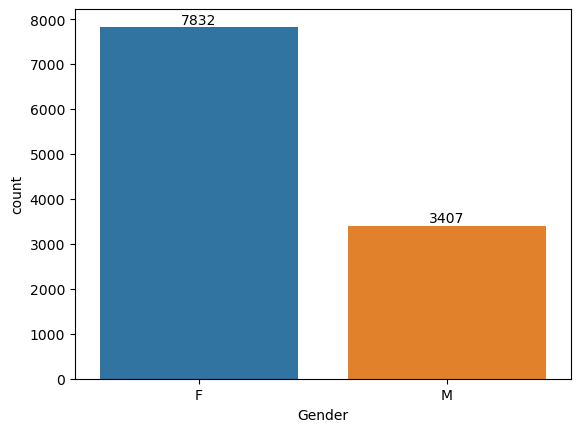

In [15]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
     ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

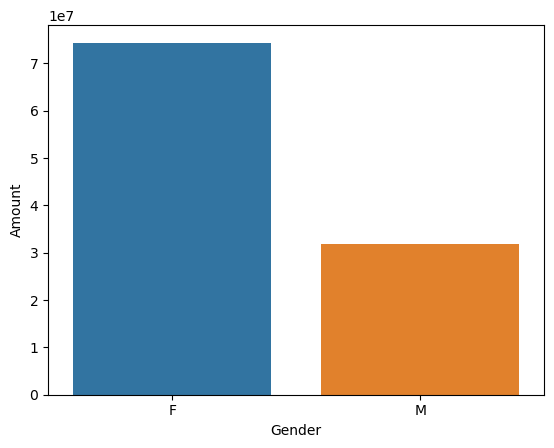

In [16]:
df.groupby(['Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sales_gen = df.groupby(['Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.barplot(x='Gender', y= 'Amount', data = sales_gen)

# Age

In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

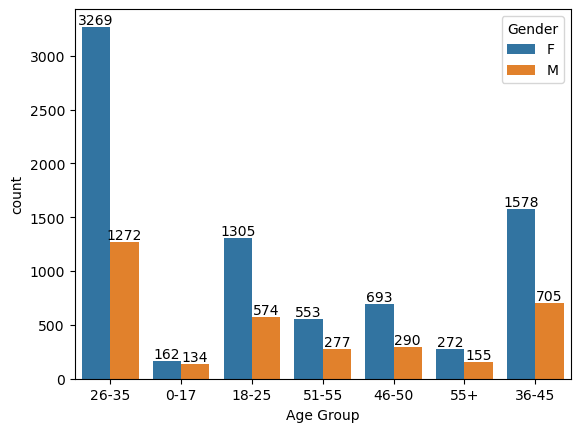

In [18]:
ax = sns.countplot(data = df, x = 'Age Group', hue ='Gender')

for bars in ax.containers:
     ax.bar_label(bars)

# States 

<Axes: xlabel='State', ylabel='Orders'>

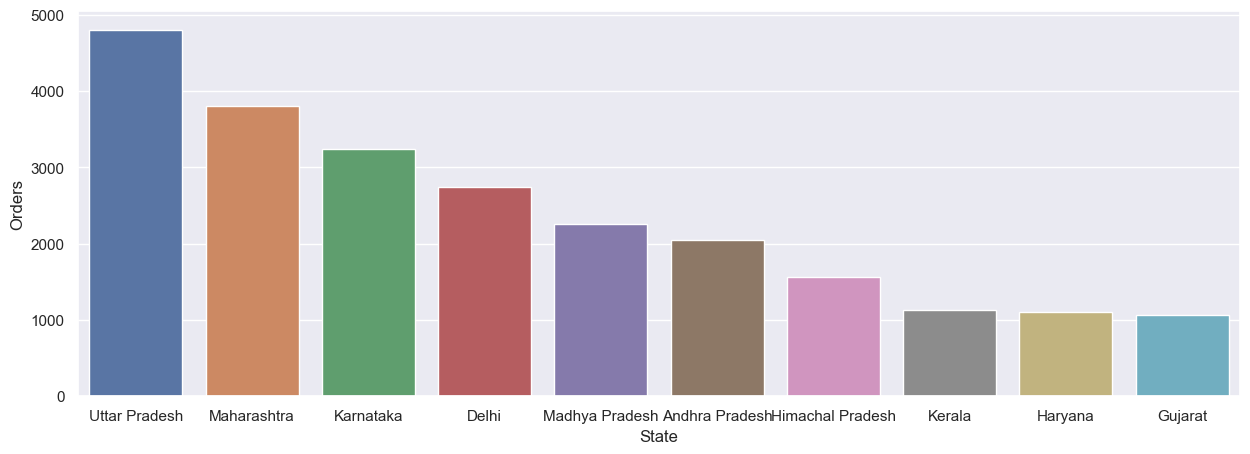

In [19]:
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc ={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State', y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

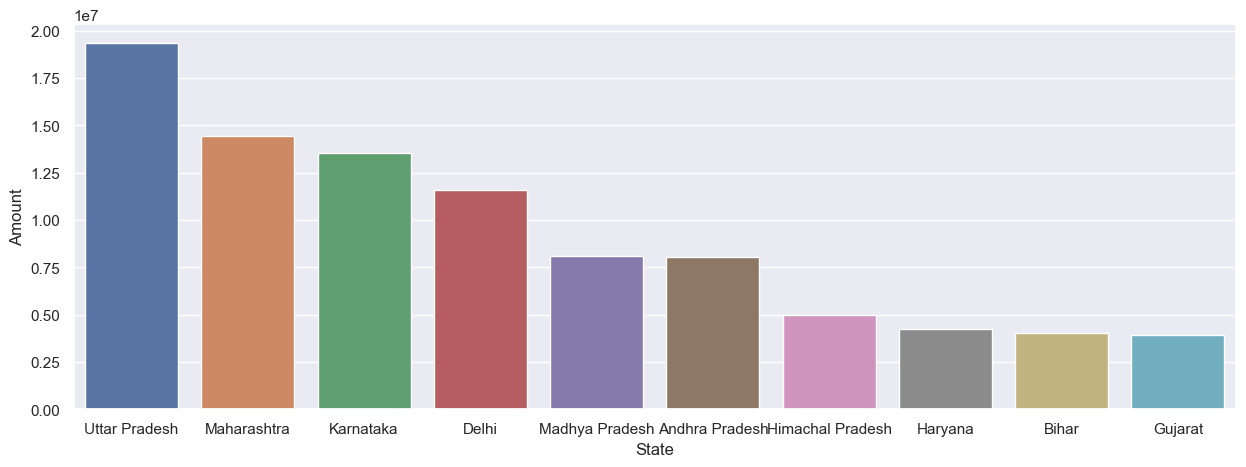

In [20]:
#total amount/sales from top 10 states 

sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x ='State',y= 'Amount')

# From above graphs we can see that unexpectedly most of the order are from Uttar Pradesh, Maharashtra and karnataka respectively nut total sales/amount is from UP, karnataka and then Maharastra

# Marital Status

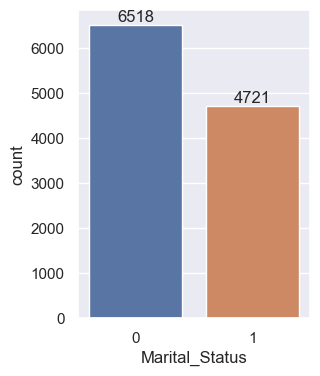

In [27]:
ax = sns.countplot(data = df, x ='Marital_Status')
sns.set(rc={'figure.figsize':(7,4)})
for bars in ax.containers:
    ax.bar_label(bars)
    

<Axes: xlabel='Marital_Status', ylabel='Amount'>

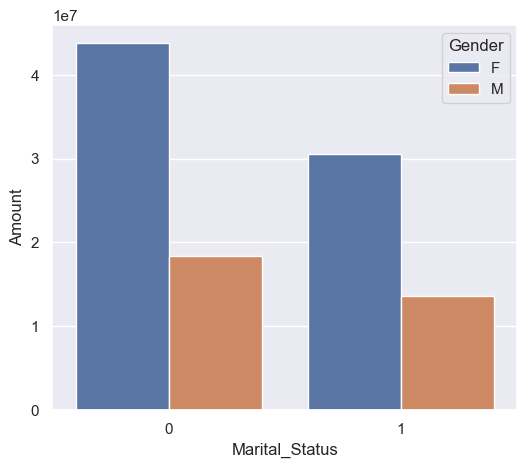

In [30]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x ='Marital_Status',y= 'Amount' , hue ='Gender')

# Most amount of shoping is done by married women

# Occupation


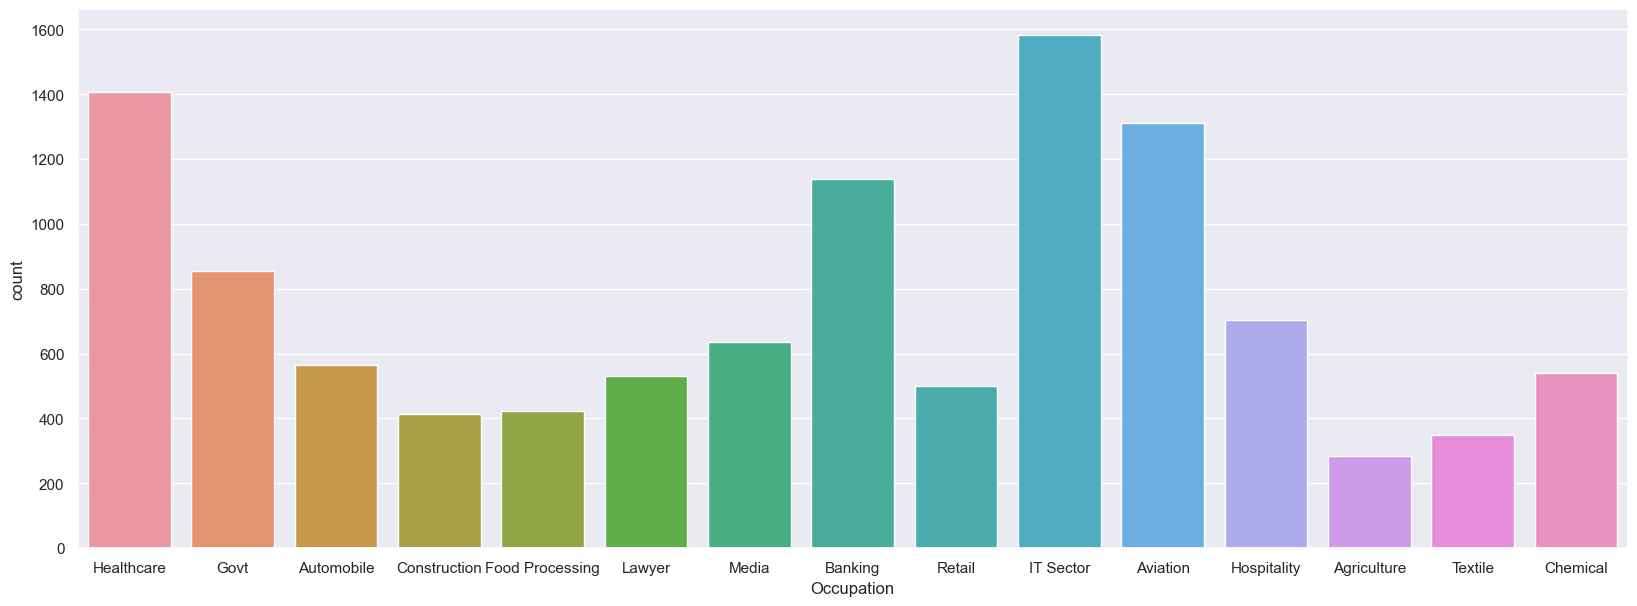

In [46]:
sns.set(rc={'figure.figsize':(20,7)})
ax = sns.countplot(data =df, x ="Occupation")

for bar in ax.containers:
    ax.bar_label(bars)



In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


<Axes: xlabel='Occupation', ylabel='Amount'>

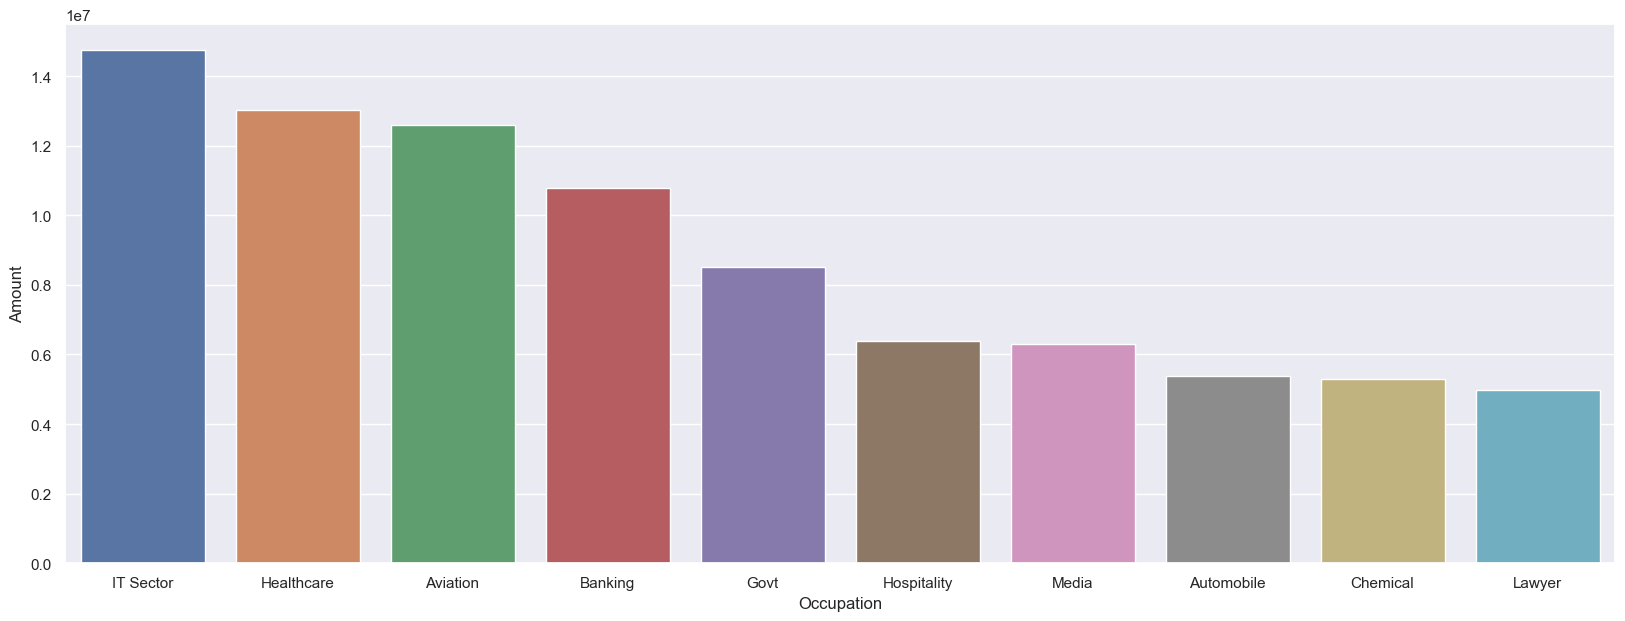

In [65]:
sales_state = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(data = sales_state, x = 'Occupation', y = 'Amount',)





# IT Sector, Healthcare, Aviation are high

# Product Category

<Axes: xlabel='Product_Category', ylabel='Amount'>

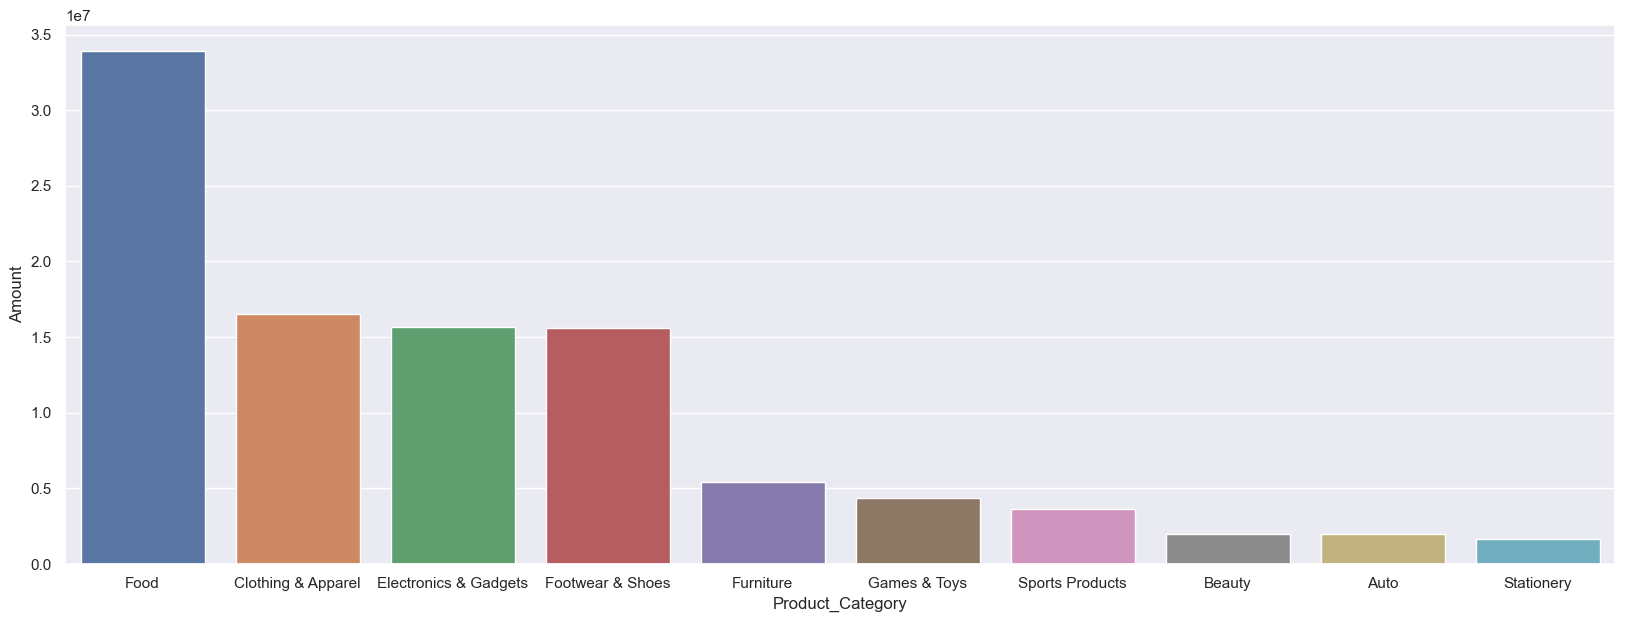

In [66]:
sales_state = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(data = sales_state, x = 'Product_Category', y = 'Amount',)

# Food, Clothing & Apparel Electronic&Gadgets

# Conclusion